In [ ]:
from sklearn import datasets
boston = datasets.load_boston(return_X_y=False)
#a) train(30%), validation (10%), and test(60%)
#i) Normalize the dataset and train the linear regression
#model using inbuild code
from sklearn.linear_model import LinearRegression

In [ ]:
print(boston)

In [ ]:
print(boston['feature_names'])

In [ ]:
print(boston['target'])

In [ ]:
print(boston['data'].shape)

In [ ]:
from sklearn.model_selection import train_test_split
import random
# train(30%), validation (10%), and test(60%)
X_train, X_test, y_train, y_test = train_test_split(boston['data'],boston['target'] , test_size=0.7, random_state=random.randint(30,100))
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.14, random_state=random.randint(30,100))
print("Size of the train dataset:",X_train.shape)
print("Size of the test dataset:",X_test.shape)
print("Size of the validation dataset:",X_validation.shape)

In [ ]:
# Plot the validation and train accuracy after each epoch
# b) Finally, report the train and test accuracy
from sklearn.linear_model import SGDRegressor
import random
def training_phase(X,y,epoch,lr,roh):
  reg = SGDRegressor(fit_intercept=True, tol=roh, alpha = lr)
  sample_weight = np.ones(X.shape[1])
  arr = []
  for i in range(0,epoch):
    if(i==0):
      for i in range(0,X.shape[1]):
        sample_weight[i] = random.uniform(0, 0.3)
    else:
      sample_weight = reg.coef_
    reg.fit(X, y,sample_weight)
    accuracy = reg.score(X, y)
  return accuracy, sample_weight

In [ ]:
import matplotlib.pyplot as plt
def plot(x,y):
  plt.title("accuracy(score) vs Epoch")
  plt.xlabel("Epoch")
  plt.ylabel("accuracy(score)")
  plt.plot(x,y,'-o')
  plt.show()

In [ ]:
import numpy as np
accuracy, weights = training_phase(X_train,y_train,5,0.00001,0.001)
print(accuracy, weights)
accuracy = np.array(accuracy)

In [ ]:
# valodation set
# find min alpha
def getMin(arr, n):
    res = arr[0]
    for i in range(1,n):
        res = min(res, arr[i])
    return res 
alpha  = np.array([0.0001,0.001,0.01,0.015, 0.01, 0.1, 0.2])
roh = 0.0001
epoch = np.array([10,20,30,40,50,60,70])
accuracy = []
all_weights = []
my_temp = []
for i in range(0,alpha.shape[0]):
  inner_acc = []
  inner_weight = []
  for j in range(0,epoch.shape[0]):
    acc, weights = training_phase(X_train,y_train,epoch[i],alpha[i],roh)
    inner_acc.append(acc)
    inner_weight.append(weights)
  my_temp.append(inner_acc)
  inner_acc = np.array(inner_acc)
  ele = getMin(inner_acc, inner_acc.shape[0])
  print(ele)
  ind = 0
  for i in range(0,epoch.shape[0]):
    if(ele==inner_acc[i]):
      ind = i
    break
  accuracy.append(inner_acc[ind])
  all_weights.append(inner_weight[ind])

In [ ]:
print(all_weights)

In [ ]:
my_accuracy = list(accuracy)
print(my_accuracy)
print(getMin(list(my_accuracy),len(my_accuracy)))
index = 0
accuracy = np.array(accuracy)
for i in range(0,epoch.shape[0]):
  value = getMin(list(accuracy),epoch.shape[0])
  if(value==accuracy[i]):
    index = i
    break
print("best hyper parameters: alpha = ", alpha[index])
print("best hyper parameters: roh = ", roh)
print("best hyper parameters: no of epoch = ", epoch[index])
print("optimial weights for test case: ",all_weights[index])

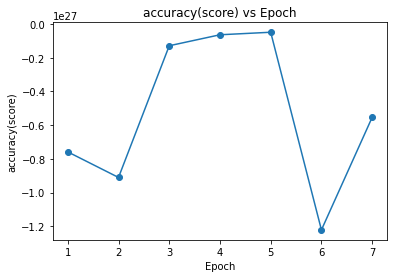

In [ ]:
epochs = np.ones(accuracy.shape[0])
for i in range(0,accuracy.shape[0]):
  epochs[i] = i+1
plot(epochs,my_temp[ind])

(13,)


# Part- B
Train the inbuild linear regression model without
normalizing the data<br/>
a) Plot the validation and train accuracy after each epoch<br/>
b) Finally, report the train and test accuracy<br/>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(boston['data'])
feature_vector = scaler.transform(boston['data'])

In [ ]:
from sklearn.model_selection import train_test_split
import random
# train(30%), validation (10%), and test(60%)
X_train, X_test, y_train, y_test = train_test_split(feature_vector, boston['target'] , test_size=0.7, random_state=random.randint(30,100))
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.14, random_state=random.randint(30,100))
print("Size of the train dataset:",X_train.shape)
print("Size of the test dataset:",X_test.shape)
print("Size of the validation dataset:",X_validation.shape)

Size of the train dataset: (151, 13)
Size of the test dataset: (305, 13)
Size of the validation dataset: (50, 13)


In [ ]:
# Plot the validation and train accuracy after each epoch
# b) Finally, report the train and test accuracy
from sklearn.linear_model import SGDRegressor
import random
def training_phase(X,y,epoch,lr,roh):
  reg = SGDRegressor(fit_intercept=True, tol=roh, alpha = lr)
  sample_weight = np.ones(X.shape[1])
  arr = []
  for i in range(0,epoch):
    if(i==0):
      for i in range(0,X.shape[1]):
        sample_weight[i] = random.uniform(0, 0.3)
    else:
      sample_weight = reg.coef_
    reg.fit(X, y,sample_weight)
    accuracy = reg.score(X, y)
    arr.append(accuracy)
  return arr, sample_weight

In [ ]:
import matplotlib.pyplot as plt
def plot(x,y):
  plt.title("Mean Square Error vs Epoch")
  plt.xlabel("Epoch")
  plt.ylabel("Mean Square Error")
  plt.plot(x,y,'-o')
  plt.show()

In [ ]:
accuracy, weights = training_phase(X_train,y_train,5,0.00001,0.001)
print(accuracy, weights)
accuracy = np.array(accuracy)

[-7.899157115691439e+25, -1.3269875151457184e+27, -3.060241103321925e+26, -3.3533183906197243e+26, -7.156108648214229e+26] [ 2.21972695e+09  1.46309082e+11 -1.59672554e+11  4.70807744e+10
 -3.75947707e+10 -3.12233972e+11 -2.31092634e+10 -8.05922694e+11
  2.72981122e+11 -4.13989864e+11 -1.46864411e+11 -2.05507693e+11
  5.83836188e+11]
